<a href="https://colab.research.google.com/github/sampath11/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Sam_Kumar_LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
### YOUR CODE STARTS HERE
import pandas as pd
import numpy as num

In [2]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"

--2019-10-07 23:32:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.04s   

2019-10-07 23:32:21 (465 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [3]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.names"

--2019-10-07 23:32:21--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6868 (6.7K) [application/x-httpd-php]
Saving to: ‘house-votes-84.names’

house-votes-84.name 100%[===================>]   6.71K  --.-KB/s    in 0s      

2019-10-07 23:32:21 (112 MB/s) - ‘house-votes-84.names’ saved [6868/6868]



In [4]:
!head -20 house-votes-84.names

1. Title: 1984 United States Congressional Voting Records Database

2. Source Information:
    (a) Source:  Congressional Quarterly Almanac, 98th Congress, 
                 2nd session 1984, Volume XL: Congressional Quarterly Inc. 
                 Washington, D.C., 1985.
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987 

3. Past Usage
   - Publications
     1. Schlimmer, J. C. (1987).  Concept acquisition through 
        representational adjustment.  Doctoral dissertation, Department of 
        Information and Computer Science, University of California, Irvine, CA.
        -- Results: about 90%-95% accuracy appears to be STAGGER's asymptote
     - Predicted attribute: party affiliation (2 classes)

4. Relevant Information:
      This data set includes votes for each of the U.S. House of
      Representatives Congressmen on the 16 key votes identified by the


In [5]:
!head house-votes-84.data

republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


In [26]:
header_names = ["Party", 
 	"handicapped-infants",
 	 "water-project-cost-sharing",
	"adoption-of-the-budget-resolutionAlcalinity of ash",
 	"physician-fee-freeze",
	"el-salvador-aid",
  "religious-groups-in-schools",
 	"anti-satellite-test-ban",
 	"aid-to-nicaraguan-contras",
	"mx-missile",
 	"immigration",
  "synfuels-corporation-cutback",
 	"education-spending"
   "superfund-right-to-sue",
   "crime",
   "duty-free-exports",
   "export-administration-act-south-africa"
    ]

## header=None, names=cols, na_values='?')
df = pd.read_csv ("house-votes-84.data", names=header_names, header=None, index_col=False, na_values='?')

df.head()

,Party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolutionAlcalinity of ash,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spendingsuperfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y


In [27]:
#filter party

df_dems = df[(df.Party =="democrat")]

df_dems.head()

,Party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolutionAlcalinity of ash,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spendingsuperfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,NaN,y,y


In [28]:
df_rep = df[df.Party == "republican"]

df_rep.head()

,Party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolutionAlcalinity of ash,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spendingsuperfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,NaN
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n
10,republican,n,y,n,y,y,n,n,n,n,n,NaN,NaN,y,y,n


In [29]:
df_dems.describe()

,Party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolutionAlcalinity of ash,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spendingsuperfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,267,258,239,260,259,255,258,259,263,248,263,255,249,252,257,251
unique,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y
freq,267,156,120,231,245,200,135,200,218,188,139,129,213,179,167,160


In [30]:
## Lets pick up issue - physician-fee-freeze

df_dems['physician-fee-freeze']

2      NaN
3        n
4        n
5        n
6        y
9        n
12       n
13       n
16       n
17       n
19       n
20       n
21       n
22       n
23       n
24       n
25       n
26       n
27       n
29       n
31       n
32       n
34       n
39       n
40       n
41       n
42       n
43       n
44       n
45       n
      ... 
385      n
386      n
387      n
388      y
389      n
390      n
391      n
394    NaN
395    NaN
396      n
397      n
398      n
406      n
407      y
408      n
411      n
414      n
415      n
417      n
418      n
419      n
421      n
422      n
423      n
424      n
425      n
426      n
428      n
429      n
431      n
Name: physician-fee-freeze, Length: 267, dtype: object

In [31]:
df_dems_phyfee_issue = df_dems['physician-fee-freeze'].map (dict(y=1, n=0))

df_dems_phyfee_issue

2      NaN
3      0.0
4      0.0
5      0.0
6      1.0
9      0.0
12     0.0
13     0.0
16     0.0
17     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
29     0.0
31     0.0
32     0.0
34     0.0
39     0.0
40     0.0
41     0.0
42     0.0
43     0.0
44     0.0
45     0.0
      ... 
385    0.0
386    0.0
387    0.0
388    1.0
389    0.0
390    0.0
391    0.0
394    NaN
395    NaN
396    0.0
397    0.0
398    0.0
406    0.0
407    1.0
408    0.0
411    0.0
414    0.0
415    0.0
417    0.0
418    0.0
419    0.0
421    0.0
422    0.0
423    0.0
424    0.0
425    0.0
426    0.0
428    0.0
429    0.0
431    0.0
Name: physician-fee-freeze, Length: 267, dtype: float64

In [0]:
df_dems_phyfee_issue = df_dems_phyfee_issue.dropna()

In [41]:
df_dems_phyfee_issue.head()

3    0.0
4    0.0
5    0.0
6    1.0
9    0.0
Name: physician-fee-freeze, dtype: float64

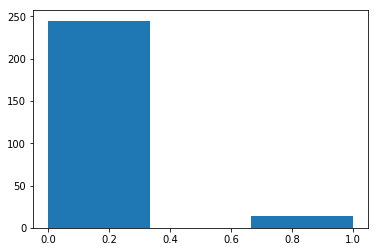

In [38]:
import matplotlib.pyplot as plt

plt.hist(df_dems_phyfee_issue, bins=3);

In [44]:
## Now pick, same issue and see Rep values

df_rep_phyfee_issue = df_rep['physician-fee-freeze'].map (dict(y=1, n=0))

df_rep_phyfee_issue.head()



0     1.0
1     1.0
7     1.0
8     1.0
10    1.0
Name: physician-fee-freeze, dtype: float64

In [43]:
df_rep_phyfee_issue = df_rep_phyfee_issue.dropna()

df_rep_phyfee_issue.head()

0     1.0
1     1.0
7     1.0
8     1.0
10    1.0
Name: physician-fee-freeze, dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


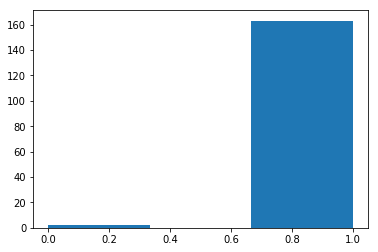

In [45]:
## Plot and see value

plt.hist(df_rep_phyfee_issue, bins=3);

In [49]:
## Now get the mean for both values
mu_dems = df_dems_phyfee_issue.mean()

mu_rep = df_rep_phyfee_issue.mean()

print (f"{mu_dems, mu_rep}")

(0.05405405405405406, 0.9878787878787879)


In [0]:
Framing null hypothesis for Physician fee freeze.

NULL HYPOTHESES:   As a group, Both Dems and Rep support the Physician fee freeze issue
  
  

In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [52]:
ttest_ind(df_rep_phyf, df_dems['physician-fee-freeze'])

TypeError: ignored